In [1]:
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
from matplotlib import style
import numpy as np
from __future__ import division
style.use('dark_background')

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
df=load_breast_cancer()

In [4]:
X=df.data

In [5]:
y=df.target

In [6]:
df.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='|S23')

In [7]:
df.target_names

array(['malignant', 'benign'],
      dtype='|S9')

In [8]:
df_X=pd.DataFrame(X)

In [9]:
df_y=pd.Series(y)

In [10]:
type(df_y)

pandas.core.series.Series

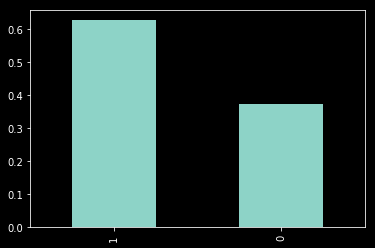

In [11]:
df_y.value_counts(normalize=True).plot(kind='bar')

In [12]:
df_X.columns=df.feature_names

In [13]:
df_X.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdca1c480d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fdca1443790>]], dtype=object)

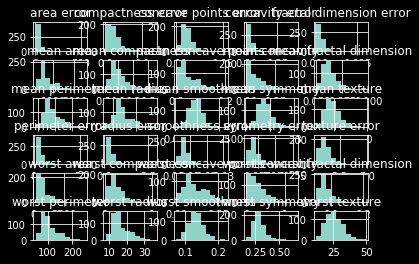

In [14]:
df_X.hist()

# KNN

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,accuracy_score

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30)

In [18]:
modelo=KNeighborsClassifier(n_neighbors=3)

In [19]:
modelo.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [22]:
y_predic=modelo.predict(X_test)

In [23]:
roc_auc_score(y_test,y_predic)

0.90350223546944863

In [24]:
sc_X=StandardScaler()
X_std=sc_X.fit_transform(X)

In [25]:
X_std_train,X_std_test,y_std_train,y_std_test=train_test_split(X_std,y,test_size=.4)

In [26]:
modeloStd=KNeighborsClassifier(n_neighbors=3)

In [27]:
modeloStd.fit(X_std_train,y_std_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [28]:
y_predicStd=modeloStd.predict(X_std_test)

In [29]:
roc_auc_score(y_predicStd,y_std_test)

0.96546155916390064

In [30]:
ls=[]
for k in range(1,30):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_std_train,y_std_train)
    y_predicted=knn.predict(X_std_test)
    ls.append(roc_auc_score(y_predicted,y_std_test))

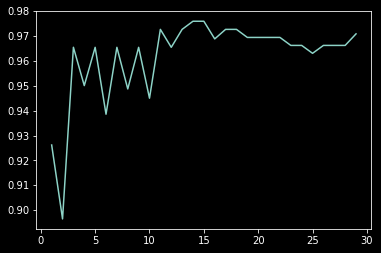

In [31]:
plt.plot(range(1,30),ls)

In [33]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [35]:
help(KNeighborsClassifier)

Help on class KNeighborsClassifier in module sklearn.neighbors.classification:

class KNeighborsClassifier(sklearn.neighbors.base.NeighborsBase, sklearn.neighbors.base.KNeighborsMixin, sklearn.neighbors.base.SupervisedIntegerMixin, sklearn.base.ClassifierMixin)
 |  Classifier implementing the k-nearest neighbors vote.
 |  
 |  Read more in the :ref:`User Guide <classification>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, optional (default = 5)
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : str or callable, optional (default = 'uniform')
 |      weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of their distance.
 |        in this case, closer neighbors of a query point will have a
 |        greater influence than neighbors which are further away.
 |      - [ca

In [57]:
param_grid={'n_neighbors':randint(1,50),
            'weights':['uniform','distance'],
            'algorithm':['ball_tree', 'kd_tree', 'brute'],
           'metric':['euclidean', 'l2', 'l1', 'manhattan', 'cityblock', 'braycurtis', 'canberra',
                     'chebyshev', 'cosine', 'dice', 'hamming', 'jaccard', 'kulsinski', 
                     'matching', 'minkowski', 'rogerstanimoto', 'russellrao', 'seuclidean',
                     'sokalmichener', 'sokalsneath', 'sqeuclidean','wminkowski']
           }

In [58]:
knn=KNeighborsClassifier()

In [59]:
grid=RandomizedSearchCV(
cv=3,
scoring='roc_auc',
estimator=knn,
n_jobs=-1,
param_distributions=param_grid)
   

In [60]:
%%time
grid.fit(X_std_train,y_std_train)

/home/moreno/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype float64 was converted to bool by check_pairwise_arrays.
  warnings.warn(msg, DataConversionWarning)
/home/moreno/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype float64 was converted to bool by check_pairwise_arrays.
  warnings.warn(msg, DataConversionWarning)


CPU times: user 384 ms, sys: 48 ms, total: 432 ms
Wall time: 1.03 s


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
          fit_params=None, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fdc9a4fac90>, 'metric': ['euclidean', 'l2', 'l1', 'manhattan', 'cityblock', 'braycurtis', 'canberra', 'chebyshev', 'cosine', 'dice', 'hamming', 'jaccard', 'kulsinski', 'matching', 'minkowski', 'rogerstanimoto', 'russellrao', 'seuclidean', 'sokalmichener', 'sokalsneath', 'sqeuclidean', 'wminkowski'], 'weights': ['uniform', 'distance'], 'algorithm': ['ball_tree', 'kd_tree', 'brute']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='roc_auc', verbose=0)

In [61]:
grid.best_estimator_

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='seuclidean',
           metric_params=None, n_jobs=1, n_neighbors=29, p=2,
           weights='uniform')

In [63]:
knn_best=grid.best_estimator_

In [64]:
knn_best.fit(X_std_test,y_std_test)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='seuclidean',
           metric_params=None, n_jobs=1, n_neighbors=29, p=2,
           weights='uniform')

In [66]:
roc_auc_score(knn_best.predict(X_std_test),y_std_test)

0.9760479041916168